In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Farmers.csv', na_values= '99', index_col= 'SN')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
#Percentage missingness column-wise
(df.isna().sum().sort_values(ascending = False) / df.shape[0] *100).round(2)

In [ ]:
#Percentage missingness row-wise
(df.isna().sum(axis =1).sort_values(ascending= False) / df.shape[1] * 100).round(2)

In [ ]:
#Assign a score for row missingness
df2 =df
df2['Score'] = (df.isna().sum(axis =1)/ df.shape[1] * 100).round(2) 

In [ ]:
df2['Score']

In [ ]:
#Drop rows where more than half the responses are missing
df3 = df2.drop(df2[df2.Score > 50].index)

In [33]:
#check how many rows were dropped
print(df2.shape)
print(df3.shape)

(51, 62)
(49, 62)


In [40]:
df2[df2.Score > 50]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_None,...,D8_Financial_Support,D8_Inputs,E1,E3,E4,E5,E6,E7,E8,Score
SN,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,...,NaN,NaN,No,No,NaN,Yes,Ibadan,2.0,2.0,86.89
10,Kogi,Female,NaN,NaN,1.0,5.0,No,NaN,2,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.82


In [34]:
# Replace Yes with 1 and No with 0
dict = {'Yes': 1, 'No': 0}
df4 = df3.replace(dict)

In [35]:
df4.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_None,...,D8_Financial_Support,D8_Inputs,E1,E3,E4,E5,E6,E7,E8,Score
SN,,,,,,,,,,,,,,,,,,,,,
1,Ekiti,Male,1.0,Regularly,5.000,10.0,1,NPFS,0,0,...,1.0,1.0,0.0,0.0,NaN,0.0,NaN,1.0,1.0,4.92
2,Ekiti,Female,0.0,Rarely,2.025,8.0,1,Farmers Business school,0,0,...,1.0,0.0,0.0,0.0,NaN,0.0,NaN,2.0,1.0,4.92
4,Lagos,Male,0.0,Rarely,10.000,11.0,1,AY-FPM,0,0,...,0.0,1.0,0.0,0.0,NaN,0.0,NaN,2.0,2.0,3.28
5,Lagos,Male,1.0,Rarely,2.000,10.0,1,"Fisheries, Goat and sheep",1,0,...,NaN,NaN,0.0,0.0,NaN,1.0,ogun,2.0,1.0,22.95
6,Kogi,Male,0.0,NaN,2.000,12.0,0,NaN,3,0,...,NaN,NaN,0.0,0.0,NaN,0.0,NaN,1.0,2.0,19.67


In [38]:
abc = df4.D8_Financial_Support + df4.E4

In [42]:
df4.A9

SN
1     0
2     0
4     0
5     1
6     3
7     2
8     2
9     0
11    0
12    1
13    1
14    0
15    2
16    2
17    2
18    0
19    2
20    0
21    1
22    3
23    1
24    2
25    0
26    0
27    0
28    2
29    1
30    0
31    2
32    0
33    2
34    1
35    0
36    0
37    0
38    1
39    1
40    1
41    1
42    1
43    0
44    0
45    1
46    0
47    1
48    2
49    1
50    3
51    0
Name: A9, dtype: int64

In [43]:
df4.A9.mean()

0.9387755102040817

In [46]:
df4.A9.median()

1.0

Text(0,0.5,'Percentage')

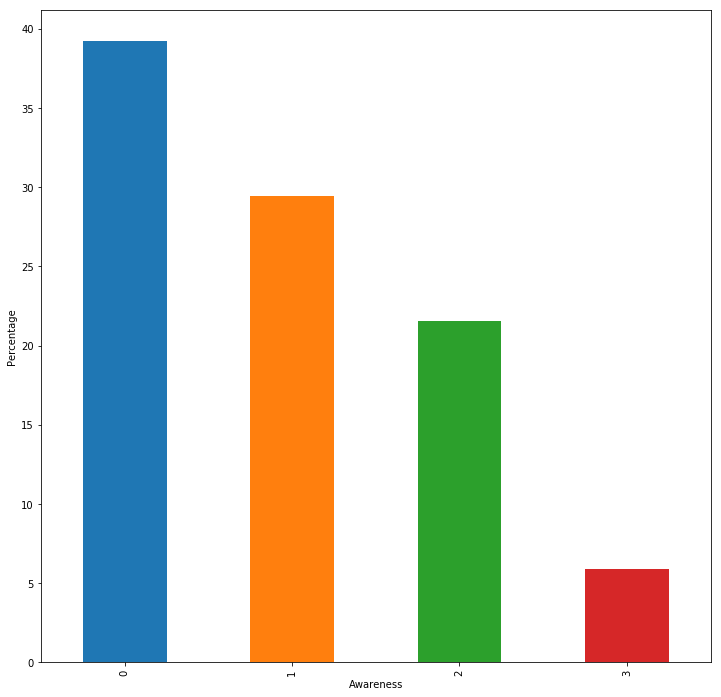

In [87]:
plt.figure(figsize= (12,12))
(df4.A9.value_counts()/51 *100).plot(kind = 'bar')
plt.xlabel('Awareness')
plt.ylabel('Percentage')

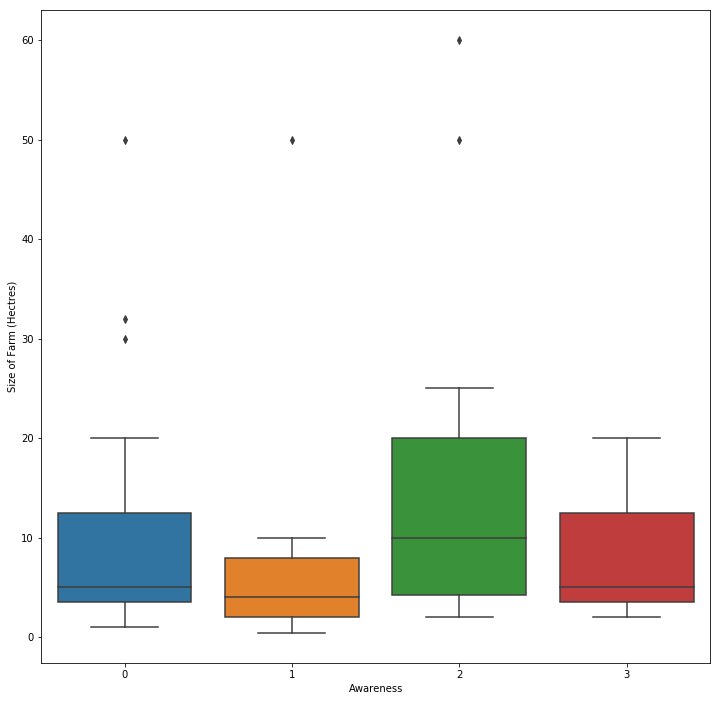

In [82]:
plt.figure(figsize= (12,12))
sns.boxplot(data =df4, x='A9', y= 'A5')
plt.ylabel('Size of Farm (Hectres)')
plt.xlabel('Awareness')
plt.show()

In [97]:
pd.unique(df4.A9)

6

In [102]:
df4['A8'].describe()

count       35
unique      21
top       AFAN
freq        10
Name: A8, dtype: object

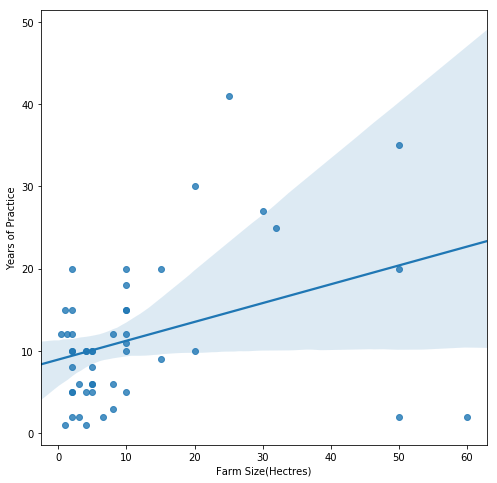

In [106]:
plt.figure(figsize= (8,8))
sns.regplot(data =df4, x='A5', y= 'A6')
plt.ylabel('Years of Practice')
plt.xlabel('Farm Size(Hectres)')
plt.show()

In [116]:
df4['Feedback'] = df4[['B8', 'B9', 'C5', 'E7', 'E8']].sum(axis =1)

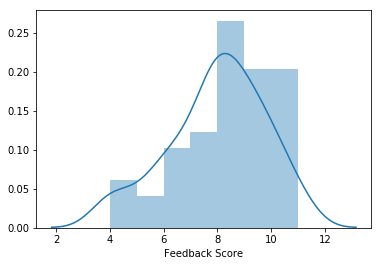

In [125]:
sns.distplot(df4['Feedback'])
plt.xlabel('Feedback Score')
plt.savefig('Feedback', dpi = 200)

In [121]:
df4['Feedback'].describe()

count    49.000000
mean      7.979592
std       1.808427
min       4.000000
25%       7.000000
50%       8.000000
75%       9.000000
max      11.000000
Name: Feedback, dtype: float64